<a href="https://colab.research.google.com/github/AnantasiiaAleks/A-B_tests/blob/main/Aleksandrovskaya_4_8_M4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [51]:
import numpy as np
import pandas as pd

import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm
sns.set_theme()

## Импорт данных

In [3]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates).
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [4]:
data = data.drop_duplicates()

In [5]:
# Вычисляем первый и третий квартили
Q1 = data['home_cost'].quantile(0.25)
Q3 = data['home_cost'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, удаляя выбросы
clear_data = data[(data['home_cost'] >= lower_bound) & (data['home_cost'] <= upper_bound)]

# Выводим количество удалённых выбросов
print(f'Количество удалённых выбросов: {len(data) - len(clear_data)}')

Количество удалённых выбросов: 13


In [30]:
# Функция для преобразования денег в удобочитаемый вид на графиках
def format_money(x, pos):
  return f'{int(x)/1000000:,}'

In [46]:
# Функция для преобразования стоимости в удобочитаемый вид на графиках
def format_cost(x, pos):
  return f'{int(x)/1000:,}'

# Проверка гипотез

# Изучение датасета
* Какие признаки численные?

    -> Численные признаки: children, salary, age, home_cost, happyness  

* Какие признаки категориальные?

    -> Категориальные признаки: was_married, sex, profession, drive_info

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5987.
  res = hypotest_fun_out(*samples, **kwds)



Признак children: Статистики= 0.844, p=1.4081907501885648e-60
Не нормальное распределение (отвергаем H0)

Признак salary: Статистики= 0.861, p=2.3386447193953246e-58
Не нормальное распределение (отвергаем H0)

Признак age: Статистики= 0.728, p=1.7226336431136731e-71
Не нормальное распределение (отвергаем H0)

Признак home_cost: Статистики= 0.995, p=4.8254901268788933e-14
Не нормальное распределение (отвергаем H0)

Признак drive_info: Статистики= nan, p=nan
Не нормальное распределение (отвергаем H0)

Признак happyness: Статистики= 0.996, p=2.4003699000457576e-12
Не нормальное распределение (отвергаем H0)


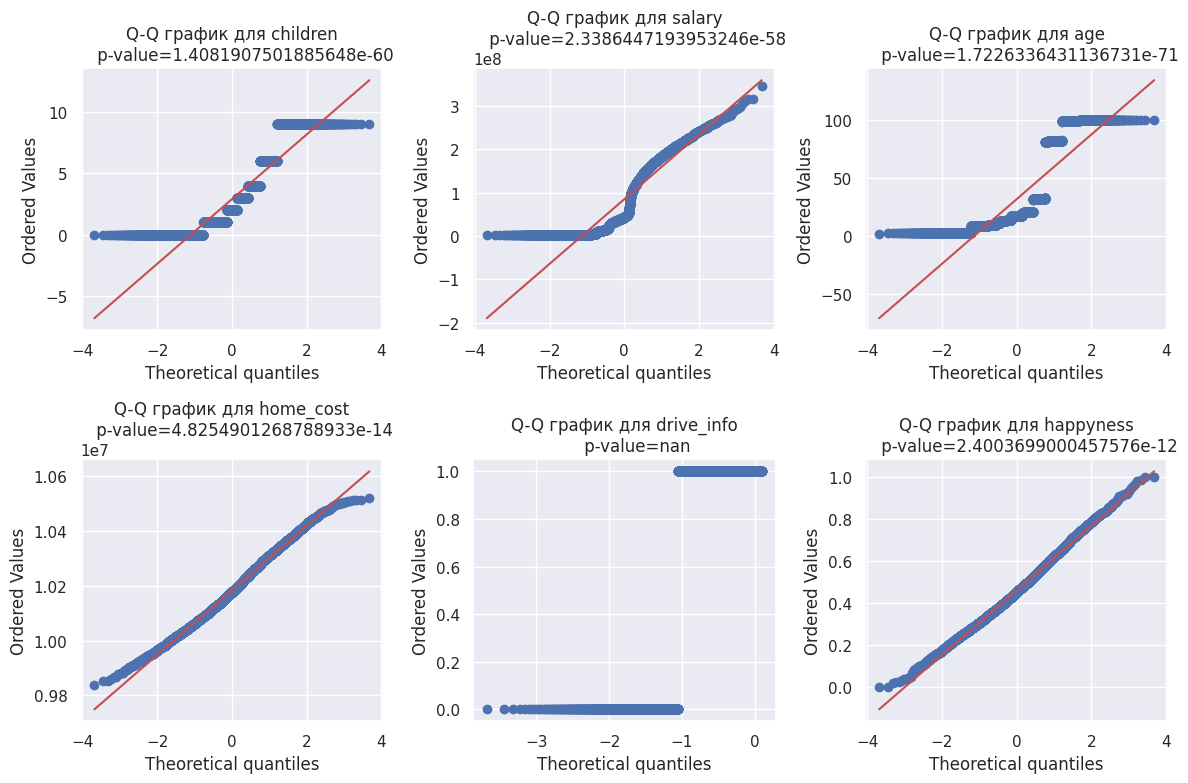

In [6]:
# Какие признаки имеют нормальное распределение?

cols = ['children', 'salary', 'age', 'home_cost', 'drive_info', 'happyness']
alpha = 0.05

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols):
    # Тест на нормальность
    statistic, p_value = sps.shapiro(clear_data[col])
    print(f'\nПризнак {col}: Статистики={statistic: .3f}, p={p_value}')
    if p_value > alpha:
        print('Нормальное распределение (не отвергаем H0)')
    else:
        print('Не нормальное распределение (отвергаем H0)')

    # Построение Q-Q графика
    plt.subplot(2, 3, i + 1)
    sps.probplot(clear_data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q график для {col}\n \
    p-value={p_value}')

plt.tight_layout()
plt.show()

* Какие признаки бессмысленные?  
    -> Бессмысленные признаки: drive_info

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

Статистик  2023861.000, p_value 2.692112571121525e-216
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


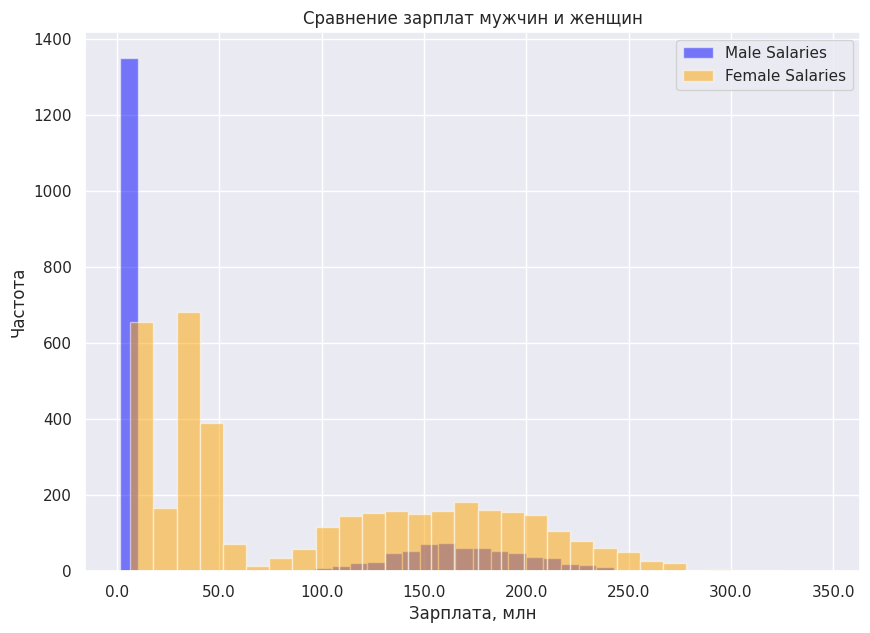

In [146]:
# Выполняем тест Манна-Уитни
male_salaries = clear_data[clear_data['sex'] == 0]['salary']
female_salaries = clear_data[clear_data['sex'] == 1]['salary']

u_value, p_value = sps.mannwhitneyu(male_salaries, female_salaries)

print(f'Статистик {u_value: .3f}, p_value {p_value}')

alpha = 0.05
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

plt.figure(figsize=(10, 7))


# Гистограмма
plt.hist(male_salaries, bins=30, alpha=0.5, label='Male Salaries', color='blue')
plt.hist(female_salaries, bins=30, alpha=0.5, label='Female Salaries', color='orange')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат мужчин и женщин')
plt.xlabel('Зарплата, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

MannwhitneyuResult(statistic=2033118.0, pvalue=3.2327873836155033e-217)

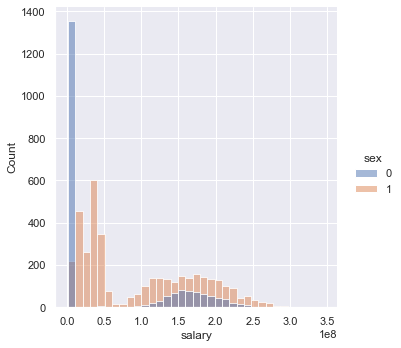

* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

Статистик 0.0, p_value 1.9494232362033102e-217
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


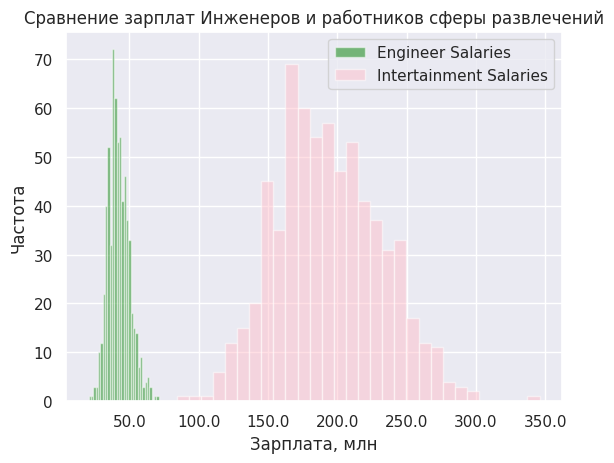

In [32]:
  # Выполняем тест Манна-Уитни
engineer_salaries = clear_data[clear_data['profession'] == 'Engineer']['salary']
intertainment_salaries = clear_data[clear_data['profession'] == 'Entertainment']['salary']

u_value, p_value = sps.mannwhitneyu(engineer_salaries, intertainment_salaries)

print(f'Статистик {u_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

# Гистограмма
plt.hist(engineer_salaries, bins=30, alpha=0.5, label='Engineer Salaries', color='green')
plt.hist(intertainment_salaries, bins=30, alpha=0.5, label='Intertainment Salaries', color='pink')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат Инженеров и работников сферы развлечений')
plt.xlabel('Зарплата, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

100%|██████████| 500/500 [00:01<00:00, 352.17it/s]


<Figure size 1500x1000 with 0 Axes>

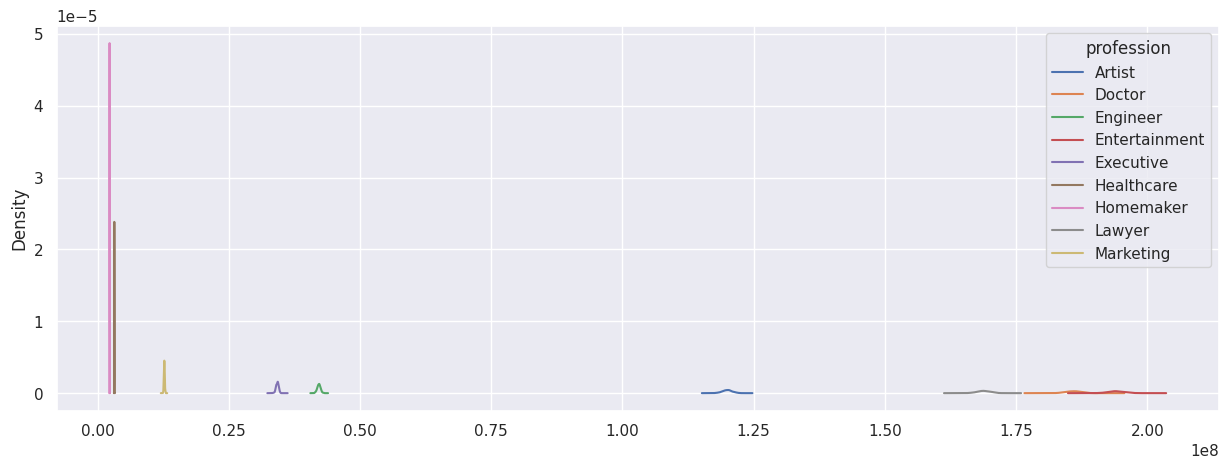

In [34]:
plt.figure(figsize=(15, 10))

boot_1d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(500)):
    boot_mean = (
        clear_data.sample(frac=1, replace=True).groupby("profession")["salary"].mean()
    )  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="density", figsize=(15, 5));

Признак Engineer: Статистики= 0.997, p=0.6207193327223022
Нормальное распределение (не отвергаем H0)
Признак Entertainment: Статистики= 0.999, p=0.9690071410670944
Нормальное распределение (не отвергаем H0)


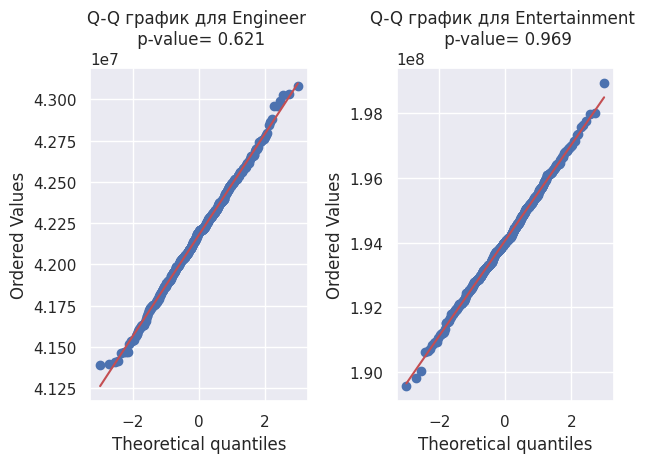

In [100]:
cols1 = ['Engineer', 'Entertainment']
alpha = 0.05

for i, col in enumerate(cols1):
  statistic, p_value = sps.shapiro(boot_1d[col])
  print(f'Признак {col}: Статистики={statistic: .3f}, p={p_value}')
  if p_value > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(1, 2, i + 1)
  sps.probplot(boot_1d[col], dist="norm", plot=plt)
  plt.title(f'Q-Q график для {col} \n p-value={p_value: .3f}')

plt.tight_layout()
plt.show()

Статистик -2258.070427082082, p_value 0.0
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


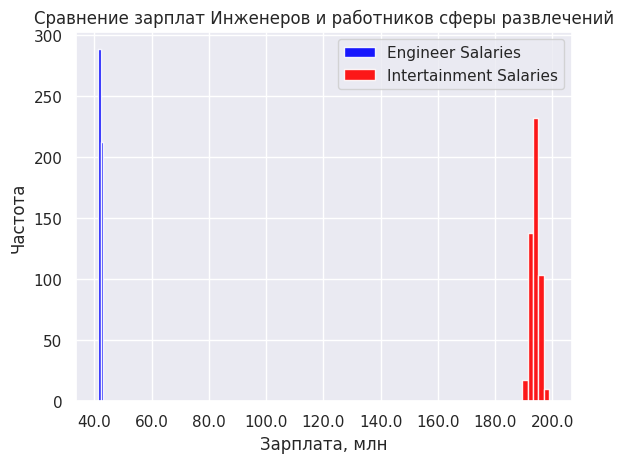

In [35]:
  #Выполняем тест Стьюдента после нормализации распределения посредством будстрепа

  # boot_1d.Entertainment

t_value, p_value = sps.ttest_ind(boot_1d.Engineer, boot_1d.Entertainment)

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

# Гистограмма
plt.hist(boot_1d.Engineer, bins=2, alpha=0.9, label='Engineer Salaries', color='blue')
plt.hist(boot_1d.Entertainment, bins=5, alpha=0.9, label='Intertainment Salaries', color='red')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат Инженеров и работников сферы развлечений')
plt.xlabel('Зарплата, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

Ttest_indResult(statistic=-100.23327557436038, pvalue=0.0)

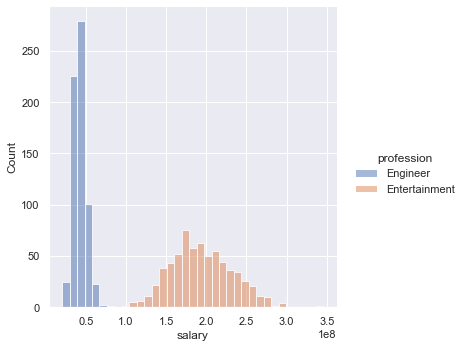

* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

Статистик  5850426.000, p_value 4.661833624771381e-194
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


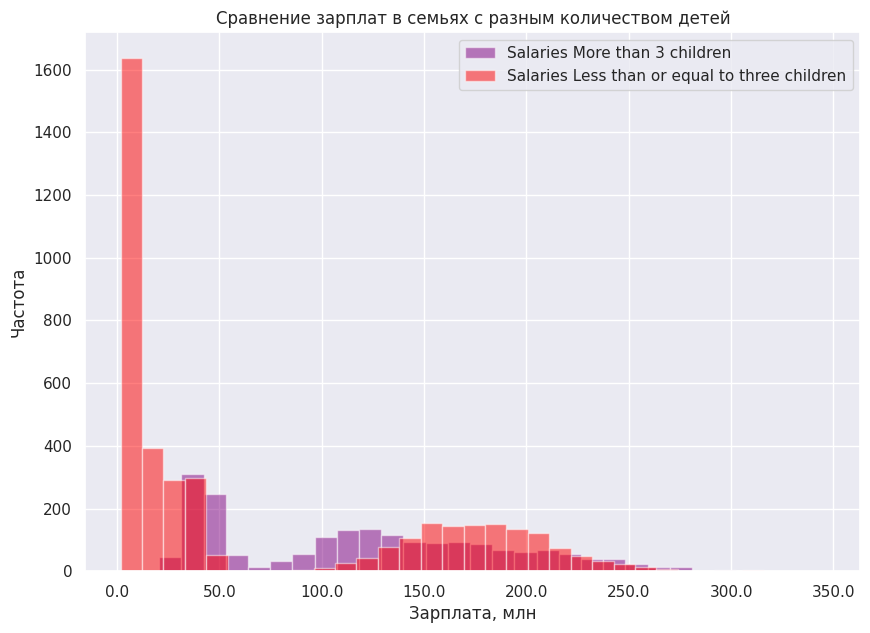

In [36]:
# Выполняем тест Манна-Уитни
more_kids_salaries = clear_data[clear_data['children'] > 3]['salary']
less_kids_salaries = clear_data[clear_data['children'] <= 3]['salary']

u_value, p_value = sps.mannwhitneyu(more_kids_salaries, less_kids_salaries)

print(f'Статистик {u_value: .3f}, p_value {p_value}')

alpha = 0.05
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

plt.figure(figsize=(10, 7))


# Гистограмма
plt.hist(more_kids_salaries, bins=30, alpha=0.5, label='Salaries More than 3 children', color='purple')
plt.hist(less_kids_salaries, bins=30, alpha=0.5, label='Salaries Less than or equal to three children', color='red')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат в семьях с разным количеством детей')
plt.xlabel('Зарплата, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

<Figure size 1200x600 with 0 Axes>

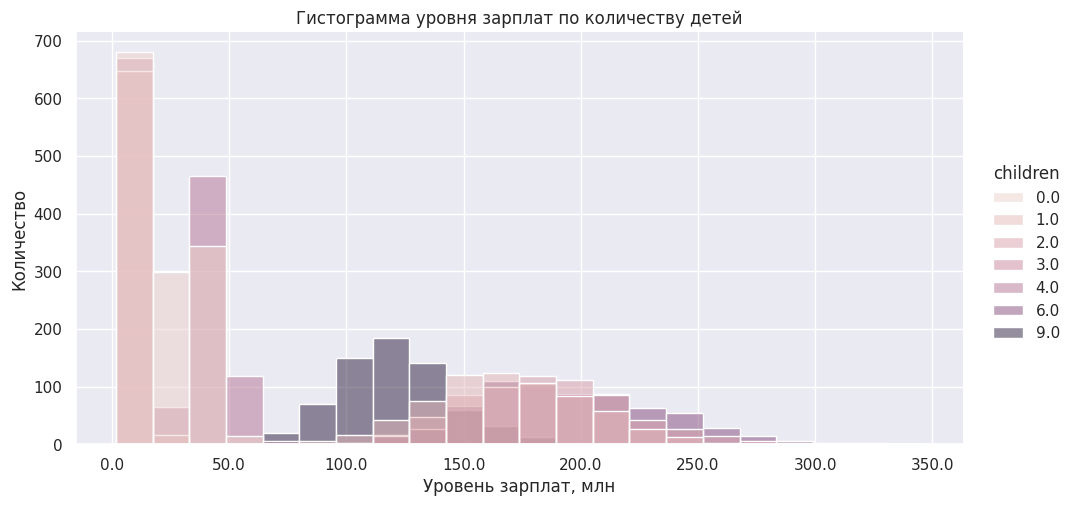

In [29]:
plt.figure(figsize=(12, 6))
sns.displot(data = clear_data, x = 'salary', hue = 'children', aspect = 2, legend =True);
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Гистограмма уровня зарплат по количеству детей')
plt.xlabel('Уровень зарплат, млн')
plt.ylabel('Количество')
plt.show()

MannwhitneyuResult(statistic=2113600.0, pvalue=1.7204616480546744e-194)

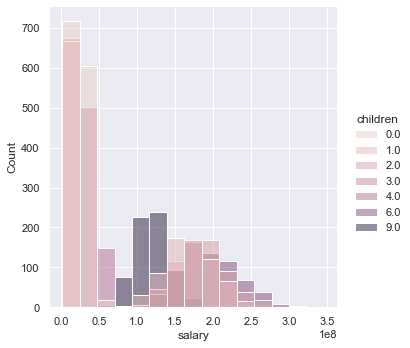

* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

Статистик  153868.000, p_value 6.414222882920992e-23
Разные распределения (отвергаем H0), существует значимая разница в стоимости домов


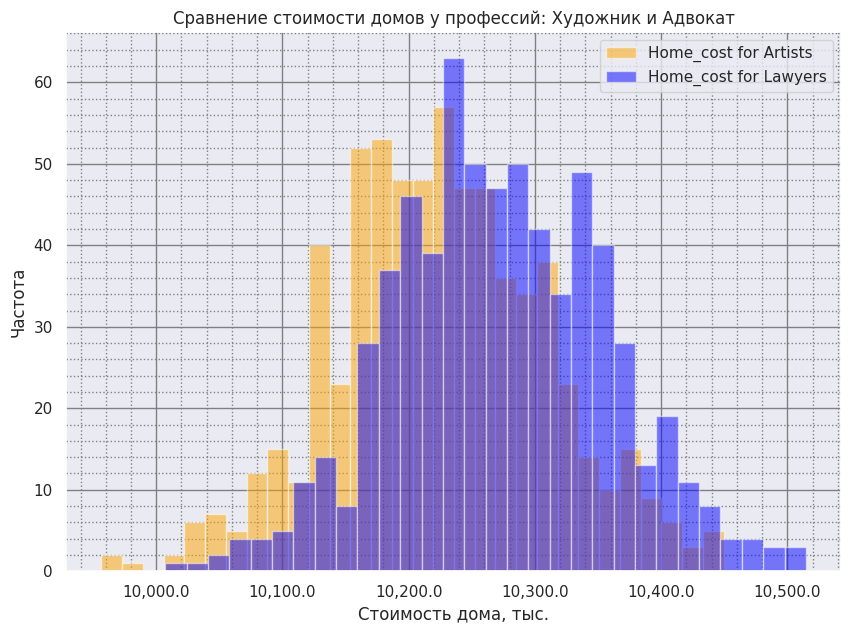

In [60]:
# Выполняем тест Манна-Уитни
artist_home_cost = clear_data[clear_data['profession'] == 'Artist']['home_cost']
lawyer_home_cost = clear_data[clear_data['profession'] == 'Lawyer']['home_cost']

u_value, p_value = sps.mannwhitneyu(artist_home_cost, lawyer_home_cost)

print(f'Статистик {u_value: .3f}, p_value {p_value}')

alpha = 0.05
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в стоимости домов')

plt.figure(figsize=(10, 7))


# Гистограмма
plt.hist(artist_home_cost, bins=30, alpha=0.5, label='Home_cost for Artists', color='orange')
plt.hist(lawyer_home_cost, bins=30, alpha=0.5, label='Home_cost for Lawyers', color='blue')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_cost))
plt.title('Сравнение стоимости домов у профессий: Художник и Адвокат')
plt.xlabel('Стоимость дома, тыс.')
plt.ylabel('Частота')
plt.grid(True, which='major', linestyle='-', color='gray')
plt.grid(True, which='minor', linestyle=':', color='gray')
plt.minorticks_on()
plt.legend(loc='upper right')

# Показ графика
plt.show()

Статистик -10.312443126358874, p_value 4.808361776839644e-24
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


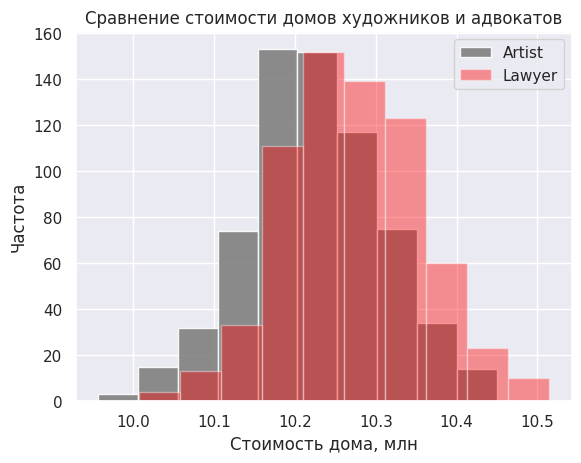

In [149]:
#Выполняем тест Стьюдента до нормализации распределения посредством будстрепа

t_value, p_value = sps.ttest_ind(artist_home_cost, lawyer_home_cost)

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

# Гистограмма
plt.hist(artist_home_cost, bins=10, alpha=0.9, label='Artist', color='gray')
plt.hist(lawyer_home_cost, bins=10, alpha=0.4, label='Lawyer', color='red')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение стоимости домов художников и адвокатов')
plt.xlabel('Стоимость дома, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

100%|██████████| 1000/1000 [00:02<00:00, 343.12it/s]


<Figure size 1500x1000 with 0 Axes>

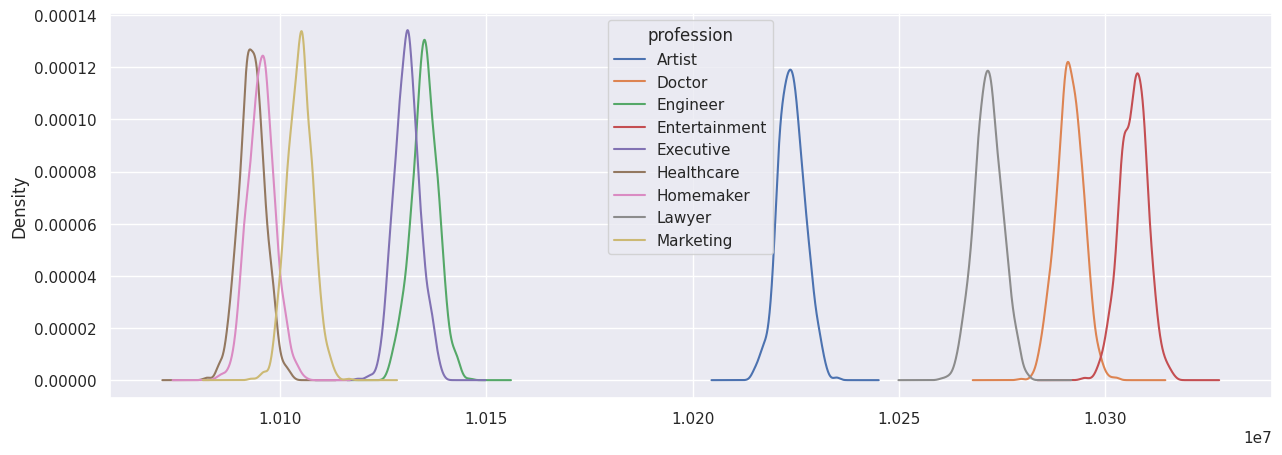

In [63]:
plt.figure(figsize=(15, 10))

boot_2d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(1000)):
    boot_mean = (
        clear_data.sample(frac=1, replace=True).groupby("profession")["home_cost"].mean()
    )  # retention_1
    boot_2d.append(boot_mean)

# Преобразование списка в DataFrame
boot_2d = pd.DataFrame(boot_2d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_2d.plot(kind="density", figsize=(15, 5));

Признак Artist: Статистики= 0.997, p=0.10931581241992089
Нормальное распределение (не отвергаем H0)
Признак Lawyer: Статистики= 0.999, p=0.7775519111094984
Нормальное распределение (не отвергаем H0)


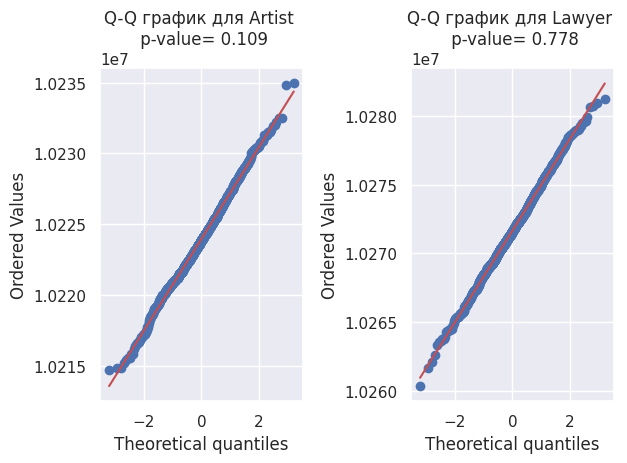

In [99]:
cols2 = ['Artist', 'Lawyer']
alpha = 0.05

for i, col in enumerate(cols2):
  statistic, p_value = sps.shapiro(boot_2d[col])
  print(f'Признак {col}: Статистики={statistic: .3f}, p={p_value}')
  if p_value > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(1, 2, i + 1)
  sps.probplot(boot_2d[col], dist="norm", plot=plt)
  plt.title(f'Q-Q график для {col} \n p-value={p_value: .3f}')

plt.tight_layout()
plt.show()

Статистик -322.9531203352185, p_value 0.0
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


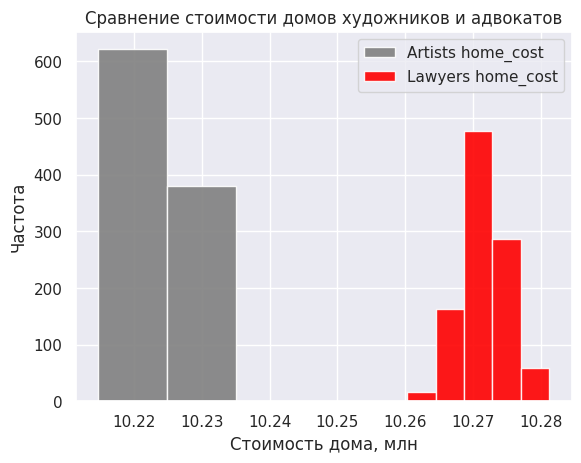

In [66]:
#Выполняем тест Стьюдента после нормализации распределения посредством будстрепа

t_value, p_value = sps.ttest_ind(boot_2d.Artist, boot_2d.Lawyer)

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

# Гистограмма
plt.hist(boot_2d.Artist, bins=2, alpha=0.9, label='Artists home_cost', color='gray')
plt.hist(boot_2d.Lawyer, bins=5, alpha=0.9, label='Lawyers home_cost', color='red')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение стоимости домов художников и адвокатов')
plt.xlabel('Стоимость дома, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

Статистик -15.789407500776711, p_value 5.14976282221811e-53
Разные распределения (отвергаем H0), существует значимая разница в зарплатах


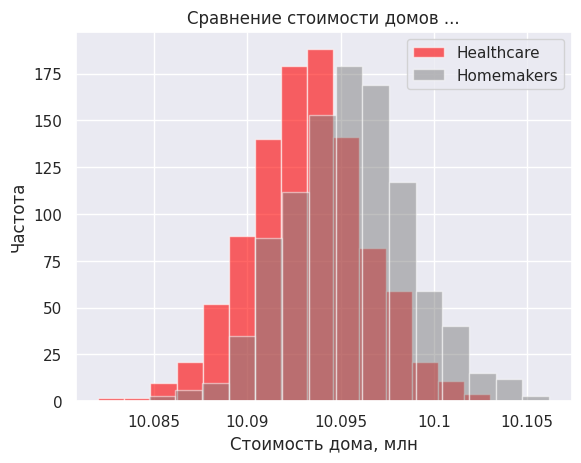

In [78]:
#Выполняем тест Стьюдента после нормализации распределения посредством будстрепа

t_value, p_value = sps.ttest_ind(boot_2d.Healthcare, boot_2d.Homemaker)

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в зарплатах')

# Гистограмма
plt.hist(boot_2d.Healthcare, bins=15, alpha=0.6, label='Healthcare', color='red')
plt.hist(boot_2d.Homemaker, bins=15, alpha=0.5, label='Homemakers', color='gray')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение стоимости домов ...')
plt.xlabel('Стоимость дома, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

Ttest_indResult(statistic=-10.422866126030229, pvalue=1.6456526985141669e-24)

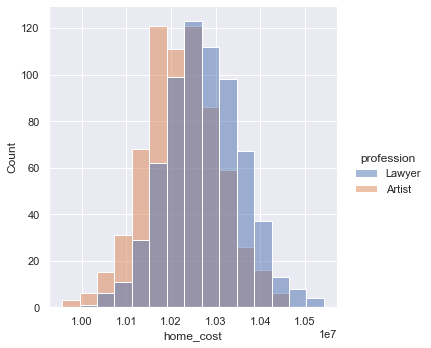

* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


Статистик  1053052.000, p_value 1.2075192012455364e-163
Разные распределения (отвергаем H0), существует значимая разница в стоимости домов


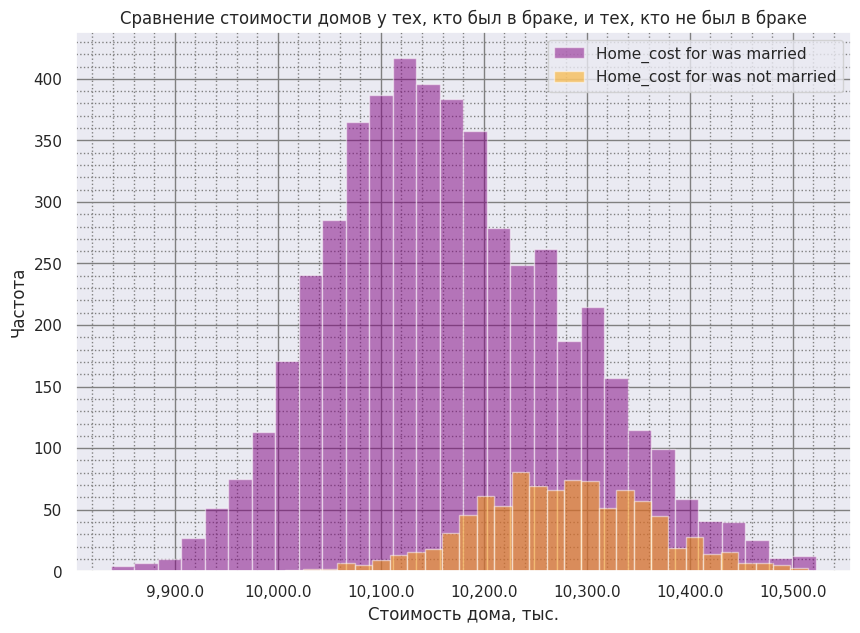

In [68]:
# Выполняем тест Манна-Уитни
married_home_cost = clear_data[clear_data['was_married'] == 1]['home_cost']
notmarried_home_cost = clear_data[clear_data['was_married'] == 0]['home_cost']

u_value, p_value = sps.mannwhitneyu(married_home_cost, notmarried_home_cost)

print(f'Статистик {u_value: .3f}, p_value {p_value}')

alpha = 0.05
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в стоимости домов')

plt.figure(figsize=(10, 7))


# Гистограмма
plt.hist(married_home_cost, bins=30, alpha=0.5, label='Home_cost for was married', color='purple')
plt.hist(notmarried_home_cost, bins=30, alpha=0.5, label='Home_cost for was not married', color='orange')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_cost))
plt.title('Сравнение стоимости домов у тех, кто был в браке, и тех, кто не был в браке')
plt.xlabel('Стоимость дома, тыс.')
plt.ylabel('Частота')
# plt.xticks(range(10000, 12000, 200), minor=True)
# plt.yticks(range(0, 70, 5))
plt.grid(True, which='major', linestyle='-', color='gray')
plt.grid(True, which='minor', linestyle=':', color='gray')
plt.minorticks_on()
plt.legend(loc='upper right')

# Показ графика
plt.show()

Статистик -27.941160137149474, p_value 1.360651636221332e-161
Разные распределения (отвергаем H0), существует значимая разница в стоимости дома


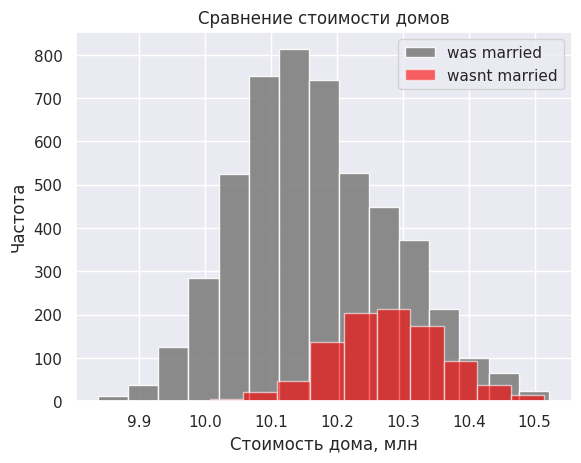

In [80]:
#Выполняем тест Стьюдента до нормализации распределения посредством будстрепа

t_value, p_value = sps.ttest_ind(married_home_cost, notmarried_home_cost)

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в стоимости дома')

# Гистограмма
plt.hist(married_home_cost, bins=15, alpha=0.9, label='was married', color='gray')
plt.hist(notmarried_home_cost, bins=10, alpha=0.6, label='wasnt married', color='red')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение стоимости домов')
plt.xlabel('Стоимость дома, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 833.67it/s]


<Figure size 1500x1000 with 0 Axes>

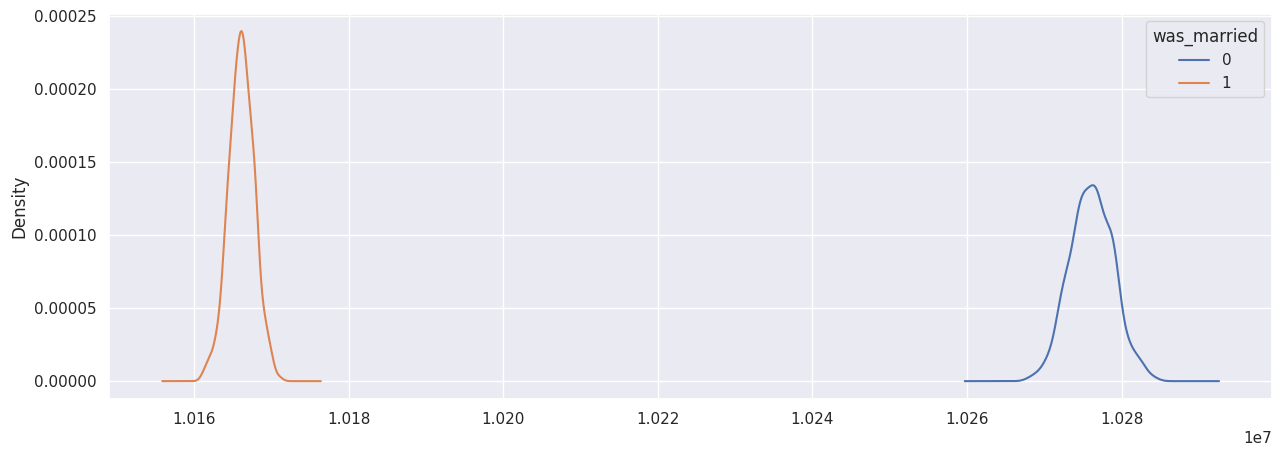

In [81]:
plt.figure(figsize=(15, 10))

boot_3d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(1000)):
    boot_mean = (
        clear_data.sample(frac=1, replace=True).groupby("was_married")["home_cost"].mean()
    )  # retention_1
    boot_3d.append(boot_mean)

# Преобразование списка в DataFrame
boot_3d = pd.DataFrame(boot_3d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_3d.plot(kind="density", figsize=(15, 5));

In [83]:
boot_3d.head()

was_married,0,1
home_cost,1.027615e+07,1.016353e+07
home_cost,1.027835e+07,1.017049e+07
home_cost,1.027913e+07,1.016722e+07
home_cost,1.026792e+07,1.016693e+07
home_cost,1.027729e+07,1.016516e+07



Признак 0: Статистики= 0.998, p=0.4962116669365398
Нормальное распределение (не отвергаем H0)

Признак 1: Статистики= 0.998, p=0.5071865170388447
Нормальное распределение (не отвергаем H0)


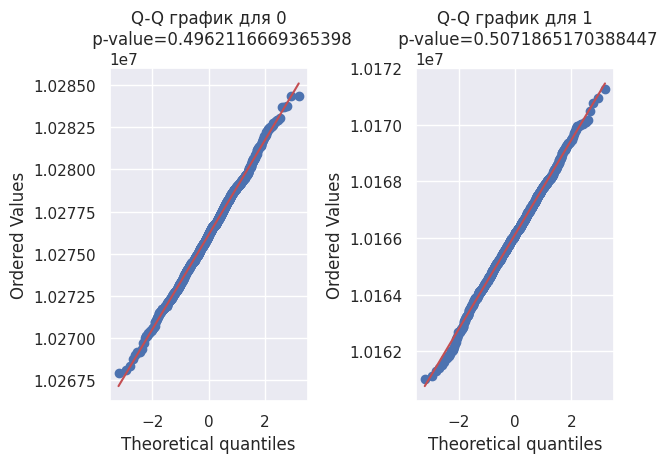

In [92]:
normals = [boot_3d[0], boot_3d[1]]
alpha = 0.05

for i, norm in enumerate(normals):
  statistic, p_value = sps.shapiro(norm)
  print(f'\nПризнак {boot_3d.columns[i]}: Статистики={statistic: .3f}, p={p_value}')
  if p_value > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(1, 2, i + 1)
  sps.probplot(norm, dist="norm", plot=plt)
  plt.title(f'Q-Q график для {boot_3d.columns[i]}\n \
    p-value={p_value}')

plt.tight_layout()
plt.show()

Статистик 1066.6338608799417, p_value 0.0
Разные распределения (отвергаем H0), существует значимая разница в стоимости домов


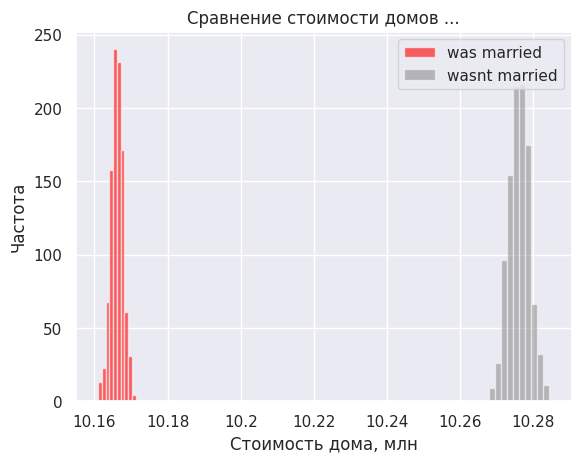

In [107]:
#Выполняем тест Стьюдента после нормализации распределения посредством будстрепа

t_value, p_value = sps.ttest_ind(boot_3d[0], boot_3d[1])

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в стоимости домов')

# Гистограмма
plt.hist(boot_3d[1], bins=10, alpha=0.6, label='was married', color='red')
plt.hist(boot_3d[0], bins=10, alpha=0.5, label='wasnt married', color='gray')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение стоимости домов ...')
plt.xlabel('Стоимость дома, млн')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

Ttest_indResult(statistic=-28.10532125782135, pvalue=2.2517376196728854e-163)

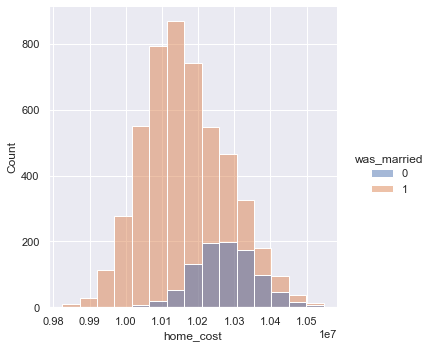

* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [108]:
# Матрица смежности
married = data.groupby(['sex', 'was_married']).size().unstack(fill_value=0)
married.columns = ['Не был(а) в браке', 'Был(а) в браке']
married.index = ['Женщины', 'Мужчины']


# Выполняем критерий хи-квадрат
xi2, p, df, expected = sps.chi2_contingency(married)

print(f'xi2 = {xi2:.3f}, p = {p:.3f}, df = {df}')
print('Ожидаемые частоты:')
print(expected)

if p < 0.05:
    print('Отвергаем H0. Мужчины в среднем чаще бывают в браке')
else:
    print('Не отвергаем H0: Нет статистически значимых различий в брачном статусе между женщинами и мужчинами.')

married

xi2 = 681.470, p = 0.000, df = 1
Ожидаемые частоты:
[[ 320.582 1708.418]
 [ 627.418 3343.582]]
Отвергаем H0. Мужчины в среднем чаще бывают в браке


,Не был(а) в браке,Был(а) в браке
Женщины,670,1359
Мужчины,278,3693


,was,not_was
sex,,
0,1358,670
1,3689,278


Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

Статистик -52.23582438135545, p_value 0.0
Женщины более счастливые


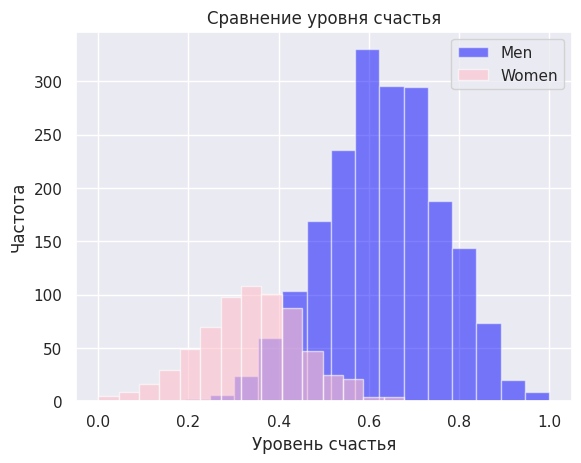

In [145]:
mean_salary = clear_data['salary'].mean()                # 84676047.94365788
median_salary = clear_data['salary'].median()           # 43054833.34499984

women = clear_data['sex'] == 0
men = clear_data['sex'] == 1

woman_happyness = clear_data[(clear_data['sex'] == 0)&(clear_data['salary'] > median_salary)]['happyness']
man_happyness = clear_data[(clear_data['sex'] == 1)&(clear_data['salary'] > mean_salary)]['happyness']

alpha = 0.05

statistic_woman, p_value_woman = sps.shapiro(woman_happyness)
# Woman_happyness: Статистики= 0.997, p=0.23174614448841208
# Нормальное распределение (не отвергаем H0)

statistic_man, p_value_man = sps.shapiro(man_happyness)
# Man_happyness: Статистики= 0.998, p=0.0036105758695640106
# Не нормальное распределение (отвергаем H0)

# Логарифмирование
log_man_happyness = np.log2(abs(man_happyness)+1)

log_stat, log_p = sps.shapiro(log_man_happyness)
# log_Man_happyness: Статистики= 0.998, p=0.054188773558338794
# Нормальное распределение (не отвергаем H0)


#Выполняем тест Стьюдента
t_value, p_value = sps.ttest_ind(woman_happyness, log_man_happyness, alternative='less')

print(f'Статистик {t_value}, p_value {p_value}')

alpha = 0.05
if p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Женщины более счастливые')

# Гистограмма
plt.hist(log_man_happyness, bins=15, alpha=0.5, label='Men', color='blue')
plt.hist(woman_happyness, bins=15, alpha=0.6, label='Women', color='pink')
plt.title('Сравнение уровня счастья')
plt.xlabel('Уровень счастья')
plt.ylabel('Частота')
plt.legend(loc='upper right')

# Показ графика
plt.show()

Статистик  148357.000, p_value 8.954623846255377e-198
Разные распределения (отвергаем H0), существует значимая разница в уровне счастья


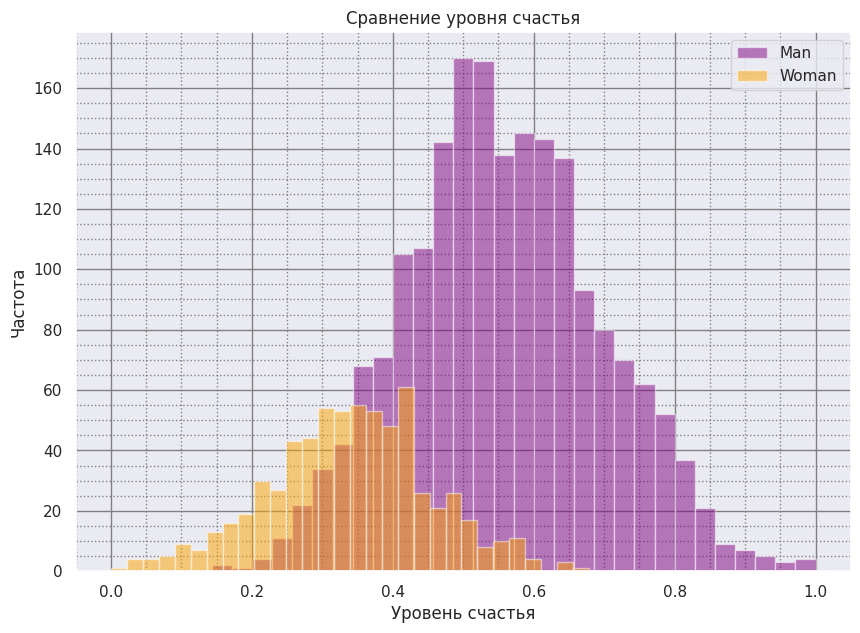

In [143]:
# 2-й способ - без нормализации

mean_salary = clear_data['salary'].mean()                # 84676047.94365788
median_salary = clear_data['salary'].median()           # 43054833.34499984

woman_happyness = clear_data[(clear_data['sex'] == 0)&(clear_data['salary'] > median_salary)]['happyness']
man_happyness = clear_data[(clear_data['sex'] == 1)&(clear_data['salary'] > mean_salary)]['happyness']

alpha = 0.05

statistic_woman, p_value_woman = sps.shapiro(woman_happyness)
# Woman_happyness: Статистики= 0.997, p=0.23174614448841208
# Нормальное распределение (не отвергаем H0)

statistic_man, p_value_man = sps.shapiro(man_happyness)
# Man_happyness: Статистики= 0.998, p=0.0036105758695640106
# Не нормальное распределение (отвергаем H0)


# Т.к. одно из распределений не нормальное, выполняем тест Манна-Уитни
u_value, p_value = sps.mannwhitneyu(woman_happyness, man_happyness)

print(f'Статистик {u_value: .3f}, p_value {p_value}')

alpha = 0.05
if p_value > alpha:
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Разные распределения (отвергаем H0), существует значимая разница в уровне счастья')

plt.figure(figsize=(10, 7))


# Гистограмма
plt.hist(man_happyness, bins=30, alpha=0.5, label='Man', color='purple')
plt.hist(woman_happyness, bins=30, alpha=0.5, label='Woman', color='orange')
plt.title('Сравнение уровня счастья')
plt.xlabel('Уровень счастья')
plt.ylabel('Частота')
plt.grid(True, which='major', linestyle='-', color='gray')
plt.grid(True, which='minor', linestyle=':', color='gray')
plt.minorticks_on()
plt.legend(loc='upper right')

# Показ графика
plt.show()